In [809]:
import numpy as np
import pandas as pd
import math
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display
import sys
import pickle
import seaborn
seaborn.set_style('ticks')
%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [810]:
#Read in data file
Ifile = pd.read_csv('cases_pop80dev0.9vac0.85dev0.1_0.csv',delim_whitespace=True,header=0)
Sfile = pd.read_csv('susc_pop80dev0.9vac0.85dev0.1_0.csv', delim_whitespace=True,header=0)
Rfile = pd.read_csv('recov_pop80dev0.9vac0.85dev0.1_0.csv', delim_whitespace=True, header=0)
Vfile = pd.read_csv('vacc_pop80dev0.9vac0.85dev0.1_0.csv', delim_whitespace=True,header=0)

In [811]:
Idata_all = Ifile.as_matrix()
Sdata_all = Sfile.as_matrix()
Rdata_all = Rfile.as_matrix()
Vdata_all = Vfile.as_matrix()

In [812]:
Idata_all = Idata_all.astype(float)
Sdata_all = Sdata_all.astype(float)
Rdata_all = Rdata_all.astype(float)
Vdata_all = Vdata_all.astype(float)

In [813]:
tsteps = len(Idata_all[:,0])
npatch = len(Idata_all[0,:])
print tsteps, npatch

1080 400


In [814]:
burnin = 600
Idata = Idata_all[burnin:,:]
Sdata = Sdata_all[burnin:,:]
Rdata = Rdata_all[burnin:,:]
Vdata = Vdata_all[burnin:,:]

In [815]:
#Outbreaks are identified as any string of more than one time-step during which I>0 in a cell.
outsize = np.zeros(npatch)
i = 1
while i<(tsteps-burnin):
    for j in range(npatch):
        if Idata[i,j] > 0.:
            if Idata[i-1,j] > 0.:
                outsize[j] += Idata[i,j]
    i += 1


In [816]:
totinf = np.sum(outsize)
totpop = Idata+Sdata+Rdata+Vdata
totpop = np.sum(totpop)
print totpop, totinf
np.log(totinf/totpop)

15275519569.0 12698965.0


-7.0924863037179051

In [817]:
-7.0924863037179051 : c 0.25
-7.5835777702491347 : c 1.0

-7.583577770249135

In [818]:
Ipercent = np.zeros([5,5])

In [819]:
Ipercent[0,0] = -8.6102781003349236
Ipercent[0,1] = -8.6163582691631753
Ipercent[0,2] = -8.6364644509596999
Ipercent[0,3] = -8.6502362658544225
Ipercent[0,4] = -8.6643783877996192
Ipercent[1,0] = -8.4849975751631472
Ipercent[1,1] = -8.4944934308549005
Ipercent[1,2] = -8.5229000241169288
Ipercent[1,3] = -8.5487777730736294
Ipercent[1,4] = -8.5660533870942626
Ipercent[2,0] = -8.4144247048971028
Ipercent[2,1] = -8.4253785062705226
Ipercent[2,2] = -8.4572749876466276
Ipercent[2,3] = -8.49611756762258
Ipercent[2,4] = -8.5292274551975833
Ipercent[3,0] = -8.377575076671322
Ipercent[3,1] = -8.3890752627952683
Ipercent[3,2] = -8.4219676431903903
Ipercent[3,3] = -8.4638278225739274
Ipercent[3,4] = -8.4994621142002416
Ipercent[4,0] = -8.3566719610978559
Ipercent[4,1] = -8.3712615366034271
Ipercent[4,2] = -8.4047361231249447
Ipercent[4,3] = -8.4491484830376855
Ipercent[4,4] = -8.4864679590189933


In [820]:
Ipercent = Ipercent.T

In [821]:
np.exp(Ipercent)*100

array([[ 0.01822232,  0.02065439,  0.0221647 ,  0.02299669,  0.02348245],
       [ 0.01811186,  0.02045919,  0.02192323,  0.02273374,  0.02314234],
       [ 0.01775134,  0.01988619,  0.02123499,  0.02199814,  0.02238048],
       [ 0.01750855,  0.01937818,  0.02042599,  0.0210963 ,  0.02140826],
       [ 0.01726268,  0.01904629,  0.01976076,  0.02035778,  0.02062404]])

In [822]:
perplot = np.exp(Ipercent)*100

In [823]:
perplot

array([[ 0.01822232,  0.02065439,  0.0221647 ,  0.02299669,  0.02348245],
       [ 0.01811186,  0.02045919,  0.02192323,  0.02273374,  0.02314234],
       [ 0.01775134,  0.01988619,  0.02123499,  0.02199814,  0.02238048],
       [ 0.01750855,  0.01937818,  0.02042599,  0.0210963 ,  0.02140826],
       [ 0.01726268,  0.01904629,  0.01976076,  0.02035778,  0.02062404]])

In [824]:
Ipercent

array([[-8.6102781 , -8.48499758, -8.4144247 , -8.37757508, -8.35667196],
       [-8.61635827, -8.49449343, -8.42537851, -8.38907526, -8.37126154],
       [-8.63646445, -8.52290002, -8.45727499, -8.42196764, -8.40473612],
       [-8.65023627, -8.54877777, -8.49611757, -8.46382782, -8.44914848],
       [-8.66437839, -8.56605339, -8.52922746, -8.49946211, -8.48646796]])

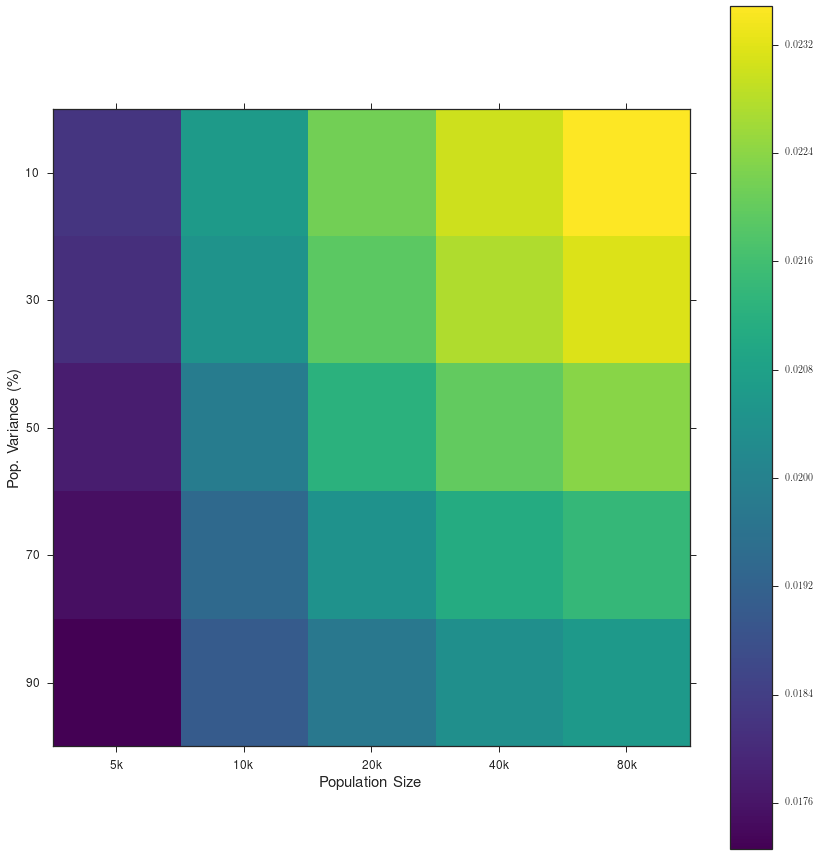

In [825]:
fig, ax = plt.subplots(figsize=(12,12))

cax = ax.imshow(perplot, interpolation='nearest', cmap='viridis')
ax.set_xticklabels([0,'5k','10k','20k','40k','80k'],fontsize=12)
ax.set_yticklabels([0,10,30,50,70,90],fontsize=12)
ax.set_xlabel('Population Size',fontsize=15)
ax.set_ylabel('Pop. Variance (\%)',fontsize=15)


#ax.set_title('Gaussian noise with vertical colorbar')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax)
#cbar.ax.set_yticklabels(['< -1', '0', '> 1'])  # vertically oriented colorbar

fig.tight_layout()

plt.savefig('Ipercent.pdf')


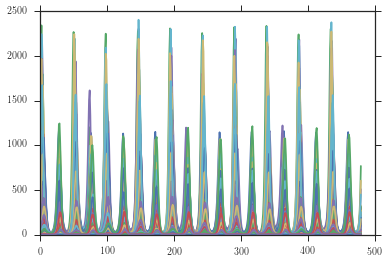

In [826]:
for i in range(npatch):
    plt.plot(Idata[:,i])